# Spotify Regression Problem - Group S

# Team Members

1. Stewart Anderson - 201994184
2. Lewis Johnston - 201979646
3. Scott Davies - 201988979
4. Annie Benzie - 201971007

# 1. Introduction

The Kaggle dataset that we were working with contained 15 variables of Spotify track attributes, including each tracks "Id" number relative to it's position in the dataset. With reference to the 15 columns, the first plainly illustrates the Id number of each track. The other 14 can be split into the following categories: 11 are numerical and 3 are categorical. These 14 attributes are described below:

Categorical Attributes:

1. title - Title of each track.
2. artist - Band or singer associated with the track.
3. top genre - The genre that is most associated with the track.

Numerical Attributes:

1. year - The year the track was released (or re-released).
2. bpm - Beats-per-minute (tempo).
3. nrgy - Energy: The greater the value, the more energetic the track is.
4. dnce - Danceability: The greater the value, the easier the track is to dance too.
5. dB - Loudness: The greater the value, the louder the song.
6.  live - Liveness: The greater the value, the higher the chance of the track being a live recording. 
7. val - Valence: The greater the value, the more positive a person's mood is around the track.
8. dur - Duration: The length of the track.
9. acous - Acousticness: The greater the value, the more instrumental the track will be.
10. spch - Speechiness: The greater the value, the more words spoken in the track.
11. pop - Popularity: The greater the value, the more popular the track is (target attribute).

The main aim of this assignment is to use machine learning regression models - simple and complex - to be able to predict the popularity score of each track in the test dataset.

# 2. Importing Relevant Packages

In [1]:
"""
        Importing Packages and Libraries

""" 

import numpy as np # Import the numpy package for working with arrays
import pandas as pd # Import the pandas package for working with dataframes
import matplotlib.pyplot as plt # Import the matplotlib package for any relevant plots we wish to visualise
import seaborn as sns # Import the seaborn package for data visualisation

# 3. Importing and Viewing the Dataset

After importing the essential libraries above, we will now look into the data we will be working with. As shown below, the data has already been split into separate training and testing sets. The summary statistics table below, in particular, allows us to visualise the range of values associated with each track attribute - which maybe useful later.

In [2]:
"""
        Importing Spotify Datasets (Training and Testing)

"""

spotify_train = pd.read_csv("CS98XRegressionTrain.csv", low_memory=False) # Importing the spotify training dataset
spotify_test = pd.read_csv("CS98XRegressionTest.csv", low_memory=False) # Importing the spotify test dataset

In [3]:
spotify_train.shape # Determining the size of the training set

(453, 15)

In [4]:
spotify_test.shape # Determining the size of the test set

(114, 14)

In [5]:
spotify_train.head(5) # Allows us to visualise the first five values for each attribute in the training set

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [6]:
spotify_train.describe() # Gives a summary of statistics (count, mean, standard deviation etc) of the training set attributes

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


# 4. Checking for Null/NaN Values

From the code below, it can be seen that we have at least one null value in the 'top genre' attribute. The method we have decided to use to clean the data here is to simply drop the tracks which have these null values.

In [7]:
spotify_train.isnull().any() # Allows us to check what columns have null values (if any)

Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [8]:
spotify_train = spotify_train.dropna(subset=["top genre"]) # Drop the null values from the 'top genre' attribute

In [9]:
spotify_train.isnull().any() # Allows us to check that all null values have now been removed

Id           False
title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

# 5. Exploratory Data Analysis (EDA)

At this stage, we will investigate the trends in the data. This will involve: visualizing each attribute individually to examine outliers, checking which attributes (if any) correlate well with our target attribute and examining the target attribute in more detail.

# 5.1 Visualizing the Data to Check for Outliers

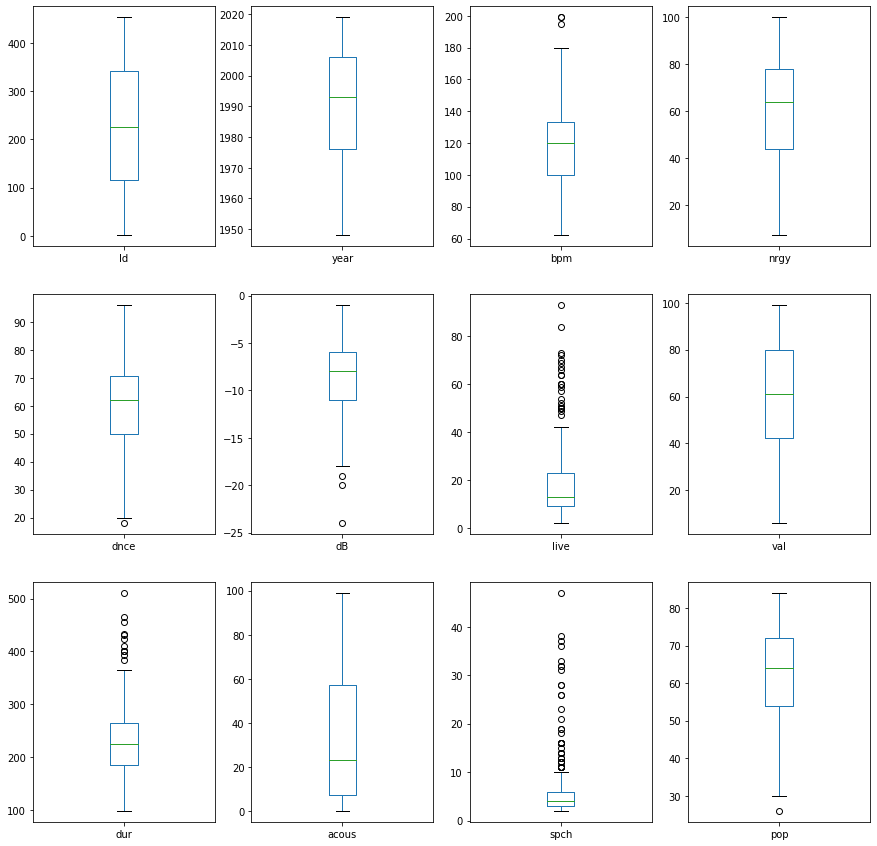

In [10]:
"""
        Boxplots of all attributes of the Dataframe - Determines where we find outliers

"""

spotify_train.plot(kind='box', subplots=True, layout=(3,4), figsize=(15, 15))
plt.show()

# Used subplots as we believe this makes an easier comparison than plotting all box plots individually. 
# We chose a layout of 3x4 as we have 12 plots so it looks neat when visualising.

From the boxplot visualization, it is clear to see that the following attributes have many outliers associated with them: "live", "dur" and "spch". The removal of these has been carried out below. However, due to the severe lack of data, keeping these outliers has actually given us more accurate predictions. Therefore, the code is commented out.

In [11]:
"""
       Removal of Outliers
"""

#Q1 = spotify_train.quantile(0.25) # Calculation of lower quartile, q1
#Q3 = spotify_train.quantile(0.75) # Calculation of upper quartile, q3
#IQR = Q3 - Q1 # Determining the inter-quartile range
#print(IQR)

'\n       Removal of Outliers\n'

In [12]:
#spotify_train = spotify_train[~((spotify_train < (Q1 - 1.5 * IQR)) | (spotify_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
"""
        Boxplots of all attributes of the Dataframe - After removal of outliers
"""

#spotify_train.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 15))
#plt.show()

'\n        Boxplots of all attributes of the Dataframe - After removal of outliers\n'

# 5.2 Looking for Correlations in the Data

The best method to determine how well certain attributes correlate well with one another is to create a heatmap, which we carried out below. We then decided to use the standard correlation coefficient (Pearson's r) to visualize how well/poorly each attribute correlated with our target attribute 'pop'

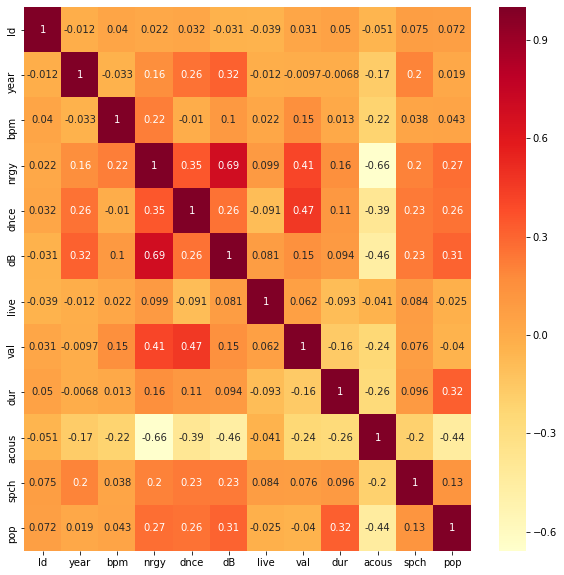

In [14]:
"""
        Heatmap for training data - Looking to find linear relationships with attributes

"""

plt.figure(figsize=(10,10))
corr = spotify_train.corr()
sns.heatmap(corr, annot=True, cmap="YlOrRd") # annot = True gives the score for each attribute

Upon examination of the heat map, it can be seen that the variables "acous", "val", and "live" have a negative correlation
with our independant variable "pop". Removal of these columns resulted in the best result for the polynomial model. This 
feature removal ended up being the most important aspect for achieving our best score. However, for the other 3 models, this 
removal of features made the model less accurate. 

In [15]:
corr_matrix = spotify_train.corr()
corr_matrix["pop"].sort_values(ascending=False) # Finding correlations in relation to the attribute 'pop'

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
Id       0.072073
bpm      0.042695
year     0.018926
live    -0.025493
val     -0.040035
acous   -0.443763
Name: pop, dtype: float64

From Pearson's r above, we have chosen to create a mini heatmap of the attributes that correlate well/poorly with our target variable (i.e. any attribute with a value that is not close to 0).

In [16]:
most_corr = spotify_train[['dur','dB','nrgy','dnce','spch', 'acous']] # The most/least correlating attributes w.r.t "pop"

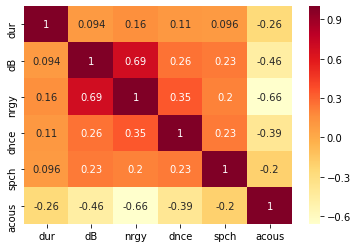

In [17]:
sns.heatmap(most_corr.corr(),annot=True,cmap="YlOrRd")

With reference to the mini heatmap, the attributes "nrgy" and "acous" have a strong negative correlation, with a score of -0.66. A reason for this could be that most instrumental tracks are played at a slow pace. Furthermore, the attributes "nrgy" and "dB" have a strong positive correlation with a score of 0.69. A reason for this could be that louder tracks will appear to give more energy to a track.

C:\Users\Stewart\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


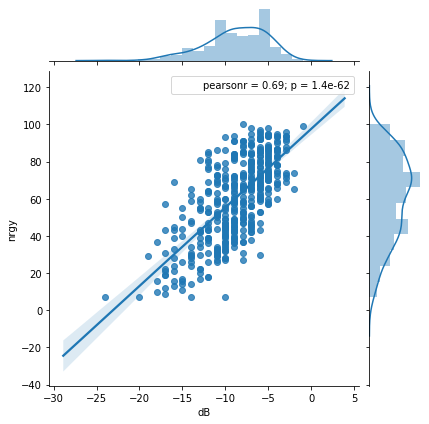

In [18]:
"""
        Visualising the correlation between the attributes "nrgy" and "db" and "nrgy" and "acous"
"""

from scipy.stats import pearsonr
sns.jointplot(data=most_corr,y='nrgy',x='dB',kind='reg',stat_func=pearsonr)

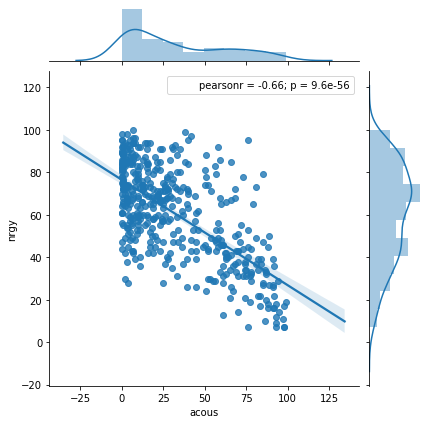

In [19]:
from scipy.stats import pearsonr
sns.jointplot(data=most_corr,y='nrgy',x='acous',kind='reg',stat_func=pearsonr)

In relation to Pearson's r, the values range from -1 to 1. A strong positive correlation should be visualised when the value is close to 1, and vice versa. Therefore, we should see a positive linear plot of "nrgy" vs "dB" and a negative linear plot of "nrgy" vs "acous", which is emphasised above.

# 5.3 Examining the Target Variable in More Detail

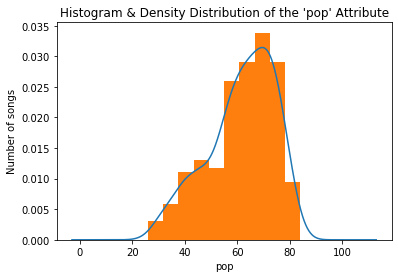

In [20]:
"""
            Histogram & Density distrubution of the 'pop' attribute
"""

num_bins = 10 # The number of different segments on the histogram - We believe 10 is a relatively nice number for this data
spotify_train["pop"].plot.kde(alpha=1) # A plot of density distribution for the variable 'pop' for each song
plt.hist(spotify_train['pop'], num_bins, alpha=1, density=True) # A histogram plot for the same variable, where 'alpha'  
#relates to the brightness of the plots. We need to assign a 'density=true' argument onto the histogram plot as this will
#essentially normalise the plot (frequency between 0 and 1) so that this doesn't dominate the density distribution plot.

plt.xlabel("pop")
plt.ylabel("Number of songs")
plt.title("Histogram & Density Distribution of the 'pop' Attribute")
plt.show()

This plot of the target attribute "pop" clearly shows that the majority of tracks have a popularity score between 55 and 75. Due to how congested this is and with such little data to train on, it was very difficult to achieve very accurate predictions when we trained the data on the machine learning (ML) models.

# 6. Preparing the Data for Machine Learning Models

First of all, we have separated the training data into features (spotify_train_new) and labels (spotify_labels). We also tried three different scenarios of dropping specific attributes to determine whether this could improve our predictions. These are described below in the order they appear:

1. This scenario resulted in our most accurate predictions for the following three models: Linear Regression, Random Forest Regression and SVM Regression.
2. For this scenario, we included the "year" and "top genre" attributes as we would later manually one-hot encode these to determine whether or not this would improve our predictions. However, our predictions were less accurate for all four models, hence, this has been commented out.
3. We also felt it would be a good idea to only train on the attributes which correlated well with our target attribute. However, presumably from the lack of training data, this also made our predictions worse and has therefore been commented out also.

NB: For the polynomial regression model, we have reduced the training dataset later and explained why these extra attributes have been removed.

In [21]:
"""
        Separating the training data into data and labels

"""

spotify_labels = spotify_train["pop"].copy() # Creating a labels variable for the 'pop' attribute
spotify_train_new = spotify_train.drop("pop", axis=1) # Creating a new dataset with the target attribute removed

In [22]:
"""
            Removing unnecessary columns and creating new (and simpler) test and train sets

"""

spotify_train_new = spotify_train_new.drop(["title", "artist", "top genre", "year", "Id"], axis=1)

#spotify_train_new = spotify_train_new.drop(["Id", "title", "artist"], axis=1) 

#spotify_train_new = spotify_train_new.drop(["title", "artist", "top genre", "bpm", "live", "val", "spch", "year", "acous"], 
#                                          axis=1) 


In [23]:
spotify_test_new = spotify_test.drop(["title", "artist", "top genre", "year", "Id"], axis=1)

#spotify_test_new = spotify_test.drop(["Id","title", "artist"], axis=1)

#spotify_test_new = spotify_test.drop(["title", "artist", "top genre", "year", "bpm", "live", "val", "spch", "acous"],
#                                       axis=1)


In [24]:
spotify_train_new.head() # Lets take a quick look at our new training dataset

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
2,105,36,63,-9,13,67,245,11,3
3,170,28,47,-16,13,33,232,25,3
4,121,47,56,-8,15,40,193,45,3
5,110,56,71,-7,12,23,223,15,6


In [25]:
spotify_test_new.head() # Lets take a quick look at our new training dataset

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,154,93,65,-3,75,74,213,1,18
1,161,39,30,-15,11,14,292,26,3
2,64,46,27,-7,12,18,179,38,3
3,127,92,71,-9,37,53,216,6,4
4,115,46,56,-12,21,34,153,18,3


# 7. Data Cleaning and the Handling of Categorical Attributes

In the first part of this section, we manually one-hot encoded the attributes "year" and "top genre" as part of the 2nd scenario described in the last section. For the "year" attribute, to achieve a fairly even split of 0's and 1's, we decided to cut-off at the year 1990. This gave us a split of 196 for 0 and 242 for 1. For the "top genre" attribute, we used a similar technique and cut-off after the top five genres. This gave us a split of 227 for 0 and 211 for 1.

In the last part of this section, we used a simple imputer method to calculate the median of each numerical attribute. This, in turn, would then replace any null numerical values with these median values. Despite us not having any null numerical values for this assignment, it was good practice to include this incase we need to use this technique on future regression problems.

# 7.1 Manually One-Hot Encoding the 'Year' Attribute

In [26]:
#year = list(spotify_train_new["year"]) # Manually one-hot encoding the attribute "year" from the training set
#for i in range(len(year)):
    #y = year[i]
    
    #if y < 1990:
        #year[i] = 0 # If the year is less than 1990, then we encode with a 0
    #else:
        #year[i] = 1 # If the year is 1990 or greater, then we encode with a 1

#spotify_train_new["year"] = year
#spotify_train_new.head()

In [27]:
# Doing the same procedure for the test data

#year = list(spotify_test_new["year"]) # Manually one-hot encoding the attribute "year" from the test set
#for i in range(len(year)):
    #y = year[i]
    
    #if y < 1990:
        #year[i] = 0 # If the year is less than 1990, then we encode with a 0
    #else:
        #year[i] = 1 # If the year is 1990 or greater, then we encode with a 1

#spotify_test_new["year"] = year
#spotify_test_new.head()

In [28]:
#spotify_train_new["year"].value_counts() # A count of how the "year" attribute has now beem split

# 7.2 Manually One-Hot Encoding the 'Top Genre' Attribute

In [29]:
#spotify_train_new["top genre"].value_counts().head() # Check what top genre's appear the most often in songs

In [30]:
#genre = list(spotify_train_new["top genre"]) # Manually one-hot encoding the attribute "top genre" from the training set
#for i in range(len(genre)):
    #ge = genre[i]
    
    #if ge == "adult standards" or ge =="album rock" or ge== "dance pop" or ge == "brill building pop" or ge == "glam rock":
        #genre[i] = 0 # If the top genre matches any of the categories listed above, then we encode with a 0
    #else:
        #genre[i] = 1 # If the top genre doesn't match any of the categories listed above, then we encode with a 1

#spotify_train_new["top genre"] = genre
#spotify_train_new.head()

In [31]:
# Doing the same procedure for the test data

#genre = list(spotify_test_new["top genre"]) # Manually one-hot encoding the attribute "top genre" from the test set
#for i in range(len(genre)):
    #ge = genre[i]
    
    #if ge == "adult standards" or ge =="album rock" or ge== "dance pop" or ge == "brill building pop" or ge == "glam rock":
        #genre[i] = 0 # If the top genre matches any of the categories listed above, then we encode with a 0
    #else:
        #genre[i] = 1 # If the top genre doesn't match any of the categories listed above, then we encode with a 1

#spotify_test_new["top genre"] = genre
#spotify_test_new.head()

In [32]:
#spotify_train_new["top genre"].value_counts() # A count of how the "top genre" attribute has now beem split

# 7.3 Simple Imputer for Missing Numerical Values

In [33]:
"""
        Looking into the Numerical Data

"""

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

spotify_num = spotify_train_new
spotify_num.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
2,105,36,63,-9,13,67,245,11,3
3,170,28,47,-16,13,33,232,25,3
4,121,47,56,-8,15,40,193,45,3
5,110,56,71,-7,12,23,223,15,6


In [34]:
## We can now fit the imputer instance to the Spotify training data 

imputer.fit(spotify_num)

imputer.statistics_ # This will print out the median values of each attribute in a numpy array

array([120.,  64.,  62.,  -8.,  13.,  61., 224.,  23.,   4.])

In [35]:
## Now use this trained Imputer to transform the training set by replacing missing values with the median values

X = imputer.transform(spotify_num)

## Put back into a pandas Dataframe rather than a plain numpy array

spotify_tr = pd.DataFrame(X, columns=spotify_num.columns, index=spotify_num.index)
spotify_tr.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107.0,31.0,45.0,-8.0,13.0,28.0,150.0,75.0,3.0
2,105.0,36.0,63.0,-9.0,13.0,67.0,245.0,11.0,3.0
3,170.0,28.0,47.0,-16.0,13.0,33.0,232.0,25.0,3.0
4,121.0,47.0,56.0,-8.0,15.0,40.0,193.0,45.0,3.0
5,110.0,56.0,71.0,-7.0,12.0,23.0,223.0,15.0,6.0


# 8. Feature Scaling and Transformation Pipelines

Feature scaling is one of the most important transformations that needs to be applied before any ML model can be used. For example, in our dataset, the attribute "dur" ranges from 98 to 511, whereas "spch" only ranges from 2 to 47. Therefore, if we don't scale these values it will be virtually impossible to model correctly. In addition, we decided to use standardization rather than normalization as it is much less affected by outliers.

In [36]:
"""
            Feature Scaling - Using the standardization method

"""

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #Standardizing features by removing the mean and scaling to unit variance 

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # The pipeline carries this method out first
    ('std_scaler', StandardScaler()),              # and then moves onto this method of scaling
])

spotify_prepared = num_pipeline.fit_transform(spotify_num)
spotify_prepared

array([[-0.45041131, -1.33720054, -0.96059443, ..., -1.23538642,
         1.46370559, -0.48000348],
       [-0.52994373, -1.11059146,  0.20921195, ...,  0.26411561,
        -0.72459281, -0.48000348],
       [ 2.05485975, -1.47316599, -0.83061595, ...,  0.05892059,
        -0.24590254, -0.48000348],
       ...,
       [ 1.97532734, -0.24947694,  0.85910438, ...,  0.95862181,
        -0.31428686,  1.49662625],
       [ 1.85602871,  1.20082119,  0.27420119, ..., -0.58823291,
        -0.92974579,  0.41846458],
       [-0.52994373,  0.56631576,  0.53415817, ...,  0.83234795,
        -0.72459281, -0.6596971 ]])

# 9. Training and Evaluating on the Training Set

# 9.1 Linear Regression

Linear regression is the simplest method of regression and involves a linear approach to determing the relationship between an independent variable, x, and a dependent variable, y. With respect to our data, we are using a multi-variate linear regression model as we have more than one independent variable. We decided to use this simple model to start us off for two reasons: 

1. To make sure our code was working and that our training data was able to be fitted to this model
2. To determine a baseline of the root mean squared error (RMSE) and to use more complex models to lower this error to achieve more accurate predictions.

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(spotify_prepared, spotify_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Making predictions on the training data

lin_predict = lin_reg.predict(spotify_prepared)

In [39]:
# Showing actual popularity scores vs predicted popularity scores from the linear regression model

lin_res = pd.DataFrame({'Actual' : spotify_labels, 'Predicted' : lin_predict}) 
lin_res.head() # Show the first 5 results for comparison

,Actual,Predicted
0,44,55.039778
2,77,66.897170
3,67,60.281515
4,63,60.734816
5,74,69.947572


In [40]:
"""
        Evaluating the Linear Regression Model
"""

from sklearn.metrics import mean_squared_error, r2_score

lin_predict = lin_reg.predict(spotify_prepared)
lin_mse = mean_squared_error(spotify_labels, lin_predict)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(spotify_labels, lin_predict)

# Prints the Root Mean Squared Error (RMSE)
print('RMSE:', lin_rmse) 

# Prints the Coefficient of Determination (r^2)
print('r^2:', lin_r2) 

RMSE: 10.71216796545899
r^2: 0.2935358426567184


The RMSE and the r^2 scores were calculated using the metrics function. Although this is not a definitive sign of an accurate model, it is good to calculate them anyway to get a rough idea of how well each method will perform later during testing. The closer to 1 the r^2 score is and the lower the RMSE, the better the model. An RMSE score of 10.71 is an indication that our linear regression model is underfitting the training data. However, due to the lack of training data, the only viable solution would be to chose a better, more complex ML model.

In [41]:
"""
        Better Validation using Cross-Validation
"""

from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, spotify_prepared, spotify_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-lin_scores) 
lin_reg_scores = lin_reg_scores.mean()

In [42]:
def display_scores(lin_scores):
    
    print("Scores:", lin_scores)
    print("Mean:", lin_scores.mean())
    print("Standard Deviation:", lin_scores.std())

In [43]:
display_scores(lin_reg_scores)

Scores: 10.901977590121495
Mean: 10.901977590121495
Standard Deviation: 0.0


The linear model illustrates consistency which is confirmed by the cross-validation RMSE score of 10.90, which is relatively close to our initial score of 10.71. However, it shows that the model is still underfitting.

# 9.2 Random Forest Regression

Random forests are an example of an ensemble learning technique. This entails the use of multiple learning methods to achieve better predictive performance. A random forest is conctructed by many decision trees and, for regression purposes, outputs the mean prediction of each individual tree. The advantage of using random forest regression is that it generates accurate results for extremely small datasets, like ours. Furthermore, the computational cost of running random forests is relatively low compared to the majority of other complex ML models. 

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(spotify_prepared, spotify_labels)

C:\Users\Stewart\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
# Making predictions on the training data

forest_predict = forest_reg.predict(spotify_prepared)

In [46]:
# Showing actual popularity scores vs predicted popularity scores from the random forest regression model

forest_res = pd.DataFrame({'Actual' : spotify_labels, 'Predicted' : forest_predict}) 
forest_res.head() # Show the first 5 results for comparison

,Actual,Predicted
0,44,46.6
2,77,76.0
3,67,67.3
4,63,66.1
5,74,69.2


In [47]:
"""
        Evaluating the Random Forest Regression Model
"""

from sklearn.metrics import mean_squared_error, r2_score

forest_predict = forest_reg.predict(spotify_prepared)
forest_mse = mean_squared_error(spotify_labels, forest_predict)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(spotify_labels, forest_predict)

# Prints the Root Mean Squared Error (RMSE)
print('RMSE:', forest_rmse) 

# Prints the Coefficient of Determination (r^2)
print('r^2:', forest_r2) 

RMSE: 4.793710205492879
r^2: 0.8585252492979709


The RMSE and r^2 scores of 4.79 and 0.86 respectively, are more accurate than the scores we collected from the linear regression model of 10.71 and 0.29. This might seem great at first, however, we will need to use cross-validation to make sure these results are what they seem before launching this model onto the test data.

In [48]:
"""
        Better Validation using Cross-Validation
"""

from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, spotify_prepared, spotify_labels, scoring='neg_mean_squared_error', cv=10)
forest_reg_scores = np.sqrt(-forest_scores) 
forest_reg_scores = forest_reg_scores.mean()

In [49]:
def display_scores(forest_scores):
    
    print("Scores:", forest_scores)
    print("Mean:", forest_scores.mean())
    print("Standard Deviation:", forest_scores.std())

In [50]:
display_scores(forest_reg_scores)

Scores: 11.38897182519678
Mean: 11.38897182519678
Standard Deviation: 0.0


Just as we mentioned, the RMSE score wasn't as good as it seemed. By using cross-validation, we are now recieving a score of 11.39. The reason our RMSE was so low before was due to overfitting. Therefore, as we cannot add in anymore training data, we will use randomized search cross-validation to tweak the hyperparameters and hopefully achieve a more accurate RMSE score.

# 9.3 Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable, x, and dependent variable, y, is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). In this report, we have several independant variables. This is part of the reason why a polynomial regression was chosen; as the nature of the data and the task would suggest that there is not a straightforward, linear relationship between the variables. It is hypothesized that the relationship between variables is curvilinear. 

NB: As the polynomial regression model also uses the linear regression model, we will implement this once more before adding the  appropriate polynomial features to this model.

In [51]:
# Dropping negative relationships for polynomial regression
# axis 1 refers to the columns
features = spotify_train_new.drop(['acous', 'val', 'live'], axis = 1) 

# Convert to numpy array
features = np.array(features)

In [52]:
#Check the shape of our arrays to make sure we did everything correctly

print('Features Shape:', features.shape)
print('Labels Shape:', spotify_labels.shape)

Features Shape: (438, 6)
Labels Shape: (438,)


In [53]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize = True)

linreg.fit(features, spotify_labels)

#Predicting on the train features
lin_predictions = linreg.predict(features)

In [54]:
#R^2 (coefficient of determination) regression score function
#Best possible score is 1.0

from sklearn.metrics import r2_score, mean_squared_error

print('RMSE:', np.sqrt(mean_squared_error(spotify_labels, lin_predictions)))
print('r^2:', r2_score(spotify_labels, lin_predictions))

RMSE: 11.33730729776272
r^2: 0.20867438872081145


In [55]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

#To generate polynomial features (here 2nd degree polynomial)
polynomial_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
x_poly = polynomial_features.fit_transform(features)

# fit the transformed features to Linear Regression
model = LinearRegression(normalize = True)
model.fit(x_poly, spotify_labels)

# predicting on training data
y_poly_pred = model.predict(x_poly)

For this model a 2nd degree polynomial was chosen. This takes our feature variables and squares them, creating a quadratic term, and turns a linear regression model into a curve. This allows for a better fit, which can capture more data, and thus improve our outcome predictions.

In [56]:
poly_rmse = np.sqrt(mean_squared_error(spotify_labels, y_poly_pred))
poly_r2 = r2_score(spotify_labels, y_poly_pred)

In [57]:
#Getting the RMSE and r^2 score for the polynomial model

print('RMSE of polynomial regression:', np.sqrt(mean_squared_error(spotify_labels, y_poly_pred)))
print('r^2 using polynomial regression:', r2_score(spotify_labels, y_poly_pred))

RMSE of polynomial regression: 10.389146294599648
r^2 using polynomial regression: 0.3354998109181241


In [58]:
# Showing actual popularity scores vs predicted popularity scores from the polynomial regression model

poly_res = pd.DataFrame({'Actual' : spotify_labels, 'Predicted' : y_poly_pred}) 
poly_res.head() # Show the first 5 results for comparison

,Actual,Predicted
0,44,44.0
2,77,62.0
3,67,56.0
4,63,58.0
5,74,66.0


As can be seen, the r²-score has increased and the RMSE has decreased compared to the linear model above.

When a 3rd degree polynomial was used, it further improved the r²-score and reduced RMSE, however, when the model was tested using the test data, the results showed negative values, highlighting that a 3rd degree polynomial was not the optimal term for this data set. This is most likely due to over-fitting occurring. This is where the model is also capturing the noise in the data. Even though this model passes through most of the data, it will fail to generalize on unseen (test) data.

In [59]:
"""
        Better Validation using Cross-Validation
"""

from sklearn.model_selection import cross_val_score

pr_scores = cross_val_score(model, x_poly, spotify_labels, scoring = 'neg_mean_squared_error', cv=10)
pr_reg_scores = np.sqrt(-pr_scores)
pr_reg_scores = pr_reg_scores.mean()

In [60]:
def display_scores(pr_scores):
    print('Scores:', pr_scores)
    print('Mean:', pr_scores.mean())
    print('Standard Deviation:', pr_scores.std())

In [61]:
display_scores(pr_reg_scores)

Scores: 11.524016119807529
Mean: 11.524016119807529
Standard Deviation: 0.0


We can see from the cross-validation results that our polynomial regression models RMSE is close to that of the mean determined from the cross validation. This tells us that our model is not over fitting and should perform quite well on the test data.

# 9.4 Support Vector Machine (SVM) Regression

Another method chosen was the use of Support Vector Machines. The main reason for choosing this method is that it is applied in a variety of applications and it is known for its kernel trick to handle nonlinear input spaces. Since polynomial regression was used previously it would be a good contrast to see how a model that can deal with different input spaces deals with the given data. Another advantage of utilising a SVM for this data is that SVM is not suitable for large datasets because of its high training time, but since the data set is so small, it should be able to cope with it.

In [62]:
from sklearn.svm import SVR

#Generate different machines with different kernels
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

#Fitting our model on train data
svr_rbf.fit(spotify_prepared, spotify_labels)
svr_lin.fit(spotify_prepared, spotify_labels)
svr_poly.fit(spotify_prepared, spotify_labels)

SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
#Making predictions on train features

rbf_predictions = svr_rbf.predict(spotify_prepared)
lin_predictions = svr_lin.predict(spotify_prepared)
poly_predictions = svr_poly.predict(spotify_prepared)

In [64]:
# Assigning variables to the RBF kernel SVM which we will be using

rbf_rmse = np.sqrt(mean_squared_error(spotify_labels, rbf_predictions))
rbf_r2 = r2_score(spotify_labels, rbf_predictions)

In [65]:
#Printing RMSE for each kernel

print('RMSE:', np.sqrt(mean_squared_error(spotify_labels, rbf_predictions)))
print('RMSE:', np.sqrt(mean_squared_error(spotify_labels, lin_predictions)))
print('RMSE:', np.sqrt(mean_squared_error(spotify_labels, poly_predictions)))

RMSE: 6.976359371568984
RMSE: 10.847085173432509
RMSE: 8.246613859204627


In [66]:
#Printing r^2 Scores for each kernel

print('r^2 SVR score with RBF kernel:', r2_score(spotify_labels, rbf_predictions))
print('r^2 SVR score with Linear kernel:', r2_score(spotify_labels, lin_predictions))
print('r^2 SVR score with Poly kernel:', r2_score(spotify_labels, poly_predictions))

r^2 SVR score with RBF kernel: 0.7003646327950135
r^2 SVR score with Linear kernel: 0.27562828153303665
r^2 SVR score with Poly kernel: 0.5813156725268696


In [67]:
#Showing actual vs predicted of each kernel on trained data

rbf_res = pd.DataFrame({'Actual': spotify_labels, 'Predicted': rbf_predictions})
lin_res = pd.DataFrame({'Actual': spotify_labels, 'Predicted': lin_predictions})
poly_res = pd.DataFrame({'Actual': spotify_labels, 'Predicted': poly_predictions})

In [68]:
rbf_res.head() # Radial basis function (rbf) kernel svm

,Actual,Predicted
0,44,48.803170
2,77,72.019807
3,67,66.899987
4,63,59.074117
5,74,73.899759


In [69]:
lin_res.head() # Linear kernel svm

,Actual,Predicted
0,44,55.647353
2,77,68.360616
3,67,60.573412
4,63,61.625908
5,74,72.772967


In [70]:
poly_res.head() # Polynomial kernel svm

,Actual,Predicted
0,44,49.859437
2,77,71.319380
3,67,67.099632
4,63,61.710212
5,74,73.624882


The scores highlight that the RBF kernel is most likely the best one to use for our data set. The Radial basis function (rbf) kernel is a popular kernel function that can map an input space in infinite dimensional space. The best thing to do after this selection is to identify if our chosen method is actually learning from our data, and not over fitting and memorizing it, as this will lead to poor accuracy when implemented on the test data.

To test this the use of K-Fold Cross Validation was used. By using Cross-Validation, we are able to initialise more metrics and draw important conclusion both about our algorithm and our data.

In [71]:
"""
        Better Validation using Cross-Validation
"""

from sklearn.model_selection import cross_val_score

#Implementing cross validation with 10 folds
rbf_scores = cross_val_score(svr_rbf, spotify_prepared, spotify_labels, scoring = 'neg_mean_squared_error', cv=10)
rbf_reg_scores = np.sqrt(-rbf_scores)
rbf_reg_scores = rbf_reg_scores.mean()

In [72]:
def display_scores(rbf_scores):
    print('Scores:', rbf_scores)
    print('Mean:', rbf_scores.mean())
    print('Standard Deviation:', rbf_scores.std())

In [73]:
display_scores(rbf_reg_scores)

Scores: 11.879536147529672
Mean: 11.879536147529672
Standard Deviation: 0.0


The scores gathered from cross validation indicate that our SVM model with the RBF kernel is slightly over fitting when training on our data. To try to reduce this we can tune the paramteres of our model. To do this we can use GridSearchCV.

# 10. Fine-Tuning Our Machine Learning Models

Fine-tuning our models allows us to tweak each models hyperparameters. This could reduce the level of overfitting in our data and lead to more accurate results. For the random forest model, we decided to use randomised search as this model has many hyperparamteres which need to be tweaked. However, for the SVM, we used grid search as there were only three hyperparameters that needed tweaking. It is worth noting that the linear model cannot be fine-tuned as it is a simple model and therefore has no hyperparameters. In addition, we were unable to get the grid search running for the polynomial model.

# 10.1 Random Forest Regression - Randomised Search

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current random forest
print('Current Parameters in Random Forest:\n')
pprint(rf.get_params())

Current Parameters in Random Forest:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = [1, 2, 3, 4, 5, 6, 7, 8]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 500, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5,
               15,
               25,
               35,
               45,
               55,
               65,
               75,
               85,
               95,
               106,
               116,
               126,
               136,
               146,
               156,
               166,
               176,
               186,
               196,
               207,
               217,
               227,
               237,
               247,
               257,
               267,
               277,
               287,
               297,
               308,
               318,
               328,
               338,
               348,
               358,
               368,
               378,
               388,
               398,
               409,
               419,
               429,
               439,
               449,
               459,
               469,
               479,
               489,
  

In [76]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(spotify_prepared, spotify_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished
C:\Users\Stewart\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [77]:
rf_random.best_params_ 

# This gives the best parameters as chosen from the randomized search and we can then manually insert these into the random
# forest model

{'n_estimators': 378,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_features': 2,
 'max_depth': 469,
 'bootstrap': True}

The hyperparameters of the randomised search can be defined below as: 

1. "n_estimators" indicates how many decision trees are applied to the random forest. 
2. "min_samples_split" shows the minimum amount of data points that can be placed at a node before that node can be split.
3. "min_samples_leaf" shows the minimum amount of data points that are allowed at a leaf node.
4. "max_features" indicates the maximum number of features that can be considered before a node can be split.
5. "max_depth" shows the maximum number of levels applied to each decision tree in the random forest.
6. "bootstrap" is a technique for sampling the data points.

NB: Due to the randomised search, the values for the hyperparameters above have changed from the optimal values we have implemented into our random forest fine-tuned model.

# 10.2 Polynomial Regression - Grid Search

In [78]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {'degree': [1,2,3,4,5]} 
#poly_grid = GridSearchCV(LinearRegression(), param_grid, cv=10, scoring='neg_mean_squared_error', verbose = 3)

In [79]:
#poly_grid.fit(features, labels)
#poly_grid.best_params_

The use of GridSearchCV to find the best degree to use for the polynomial was attempted but could not get it working. Despite this with the RMSE of the polynomial being so close to that of the results from cross validation it is safe to assume that for this problem a 2nd degree polynomial is the best fit. 

# 10.3 SVM Regression - Grid Search

In [80]:
#Specifying the paramteres for our grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e-2, 0.1, 1, 10, 100, 1000, 1e2],  
              'gamma': [1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

Here "gamma" is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma = 0.1 is considered to be a good default value.

The 'C' parameter is the regularisation parameter. This is the penalty parameter that focuses on maintaning regularization. 

In [81]:
#Fitting our grid results to out data
#Identifying what are the best parameters

grid.fit(spotify_prepared, spotify_labels)

C:\Users\Stewart\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 91 candidates, totalling 273 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ........ C=0.01, gamma=1, kernel=rbf, score=-0.108, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ........ C=0.01, gamma=1, kernel=rbf, score=-0.001, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ........ C=0.01, gamma=1, kernel=rbf, score=-0.007, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=0.01, gamma=0.1, kernel=rbf, score=-0.102, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.005, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.000, total=   0.0s
[CV] C=0.01, gamma=0.2, kernel=rbf ...................................
[CV] ...... C=0

[CV] ....... C=0.1, gamma=0.8, kernel=rbf, score=-0.105, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.8, kernel=rbf, score=0.003, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.8, kernel=rbf, score=-0.002, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.9, kernel=rbf, score=-0.107, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.9, kernel=rbf, score=0.002, total=   0.0s
[CV] C=0.1, gamma=0.9, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.9, kernel=rbf, score=-0.003, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.084, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ......... C=10, gamma=0.3, kernel=rbf, score=0.193, total=   0.0s
[CV] C=10, gamma=0.4, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.4, kernel=rbf, score=0.134, total=   0.0s
[CV] C=10, gamma=0.4, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.4, kernel=rbf, score=0.143, total=   0.0s
[CV] C=10, gamma=0.4, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.4, kernel=rbf, score=0.167, total=   0.0s
[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.5, kernel=rbf, score=0.123, total=   0.0s
[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.5, kernel=rbf, score=0.147, total=   0.0s
[CV] C=10, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.5, kernel=rbf, score=0.152, total=   0.0s
[CV] C=10, gamma=0.6, kernel=rbf .....................................
[CV] .

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.155, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.174, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.093, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.077, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.123, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.688, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-1.375, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[CV] ...... C=100.0, gamma=0.7, kernel=rbf, score=0.086, total=   0.0s
[CV] C=100.0, gamma=0.7, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.7, kernel=rbf, score=0.070, total=   0.0s
[CV] C=100.0, gamma=0.7, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.7, kernel=rbf, score=0.139, total=   0.0s
[CV] C=100.0, gamma=0.8, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.8, kernel=rbf, score=0.097, total=   0.0s
[CV] C=100.0, gamma=0.8, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.8, kernel=rbf, score=0.079, total=   0.0s
[CV] C=100.0, gamma=0.8, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.8, kernel=rbf, score=0.138, total=   0.0s
[CV] C=100.0, gamma=0.9, kernel=rbf ..................................
[CV] ...... C=100.0, gamma=0.9, kernel=rbf, score=0.097, total=   0.0s
[CV] C=100.0, gamma=0.9, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed:    5.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 100.0],
                         'gamma': [1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [82]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


We can see that the value for gamma has remained the same, indicating that the low value of 0.1 may not be under fitting our data and that the model is taking in enough of the data point when learning. The C value has been reduced tenfold, indicating that originally, our model was learning with too high of an error rate, and that a small-margin hyperplane is clearly more suited to our dataset. 

# 11. Changing Our Models Hyperparameters After Fine-Tuning

# 11.1 Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_ft = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_features = 3,
                                   max_depth = 20, bootstrap = True)
forest_reg_ft.fit(spotify_prepared, spotify_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
# Making predictions on the training data

forest_pred_ft = forest_reg_ft.predict(spotify_prepared)

In [85]:
# Showing actual popularity scores vs predicted popularity scores from the random forest regression model

forest_res_ft = pd.DataFrame({'Actual' : spotify_labels, 'Predicted' : forest_pred_ft})
forest_res_ft.head() # Show the first 5 results for comparison

,Actual,Predicted
0,44,46.530000
2,77,74.194333
3,67,63.933333
4,63,61.370000
5,74,72.639583


In [86]:
"""
        Evaluating the Random Forest Regression Model
"""

from sklearn.metrics import mean_squared_error, r2_score

forest_predict_ft = forest_reg_ft.predict(spotify_prepared)
forest_mse_ft = mean_squared_error(spotify_labels, forest_predict)
forest_rmse_ft = np.sqrt(forest_mse_ft)
forest_rmse_ft

# Prints the Root Mean Squared Error (RMSE)
print('RMSE:', forest_rmse_ft) 

# Prints the Coefficient of Determination (r^2)
print('r^2:', r2_score(spotify_labels, forest_predict_ft))

RMSE: 4.793710205492879
r^2: 0.9002327783388777


# 11.2 SVM Regression

In [87]:
#Implementing the best parameters into our model

svr_rbf_best = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1) #using best parameters from GridSearchCV
svr_rbf_best.fit(spotify_prepared, spotify_labels)
best_rbf_predictions = svr_rbf_best.predict(spotify_prepared)

In [88]:
# Getting the RMSE and r^2 scores

svm_rbf_rmse = np.sqrt(mean_squared_error(spotify_labels, best_rbf_predictions))
svm_rbf_r2 = r2_score(spotify_labels, best_rbf_predictions)

In [89]:
# Printing the RMSE and r^2 scores 

print('RMSE:', np.sqrt(mean_squared_error(spotify_labels, best_rbf_predictions)))
print('r^2 SVR best parameters:', r2_score(spotify_labels, best_rbf_predictions))

RMSE: 9.08889852593334
r^2 SVR best parameters: 0.491421619346213


As can be seen after tuning the parameters and implementing the predicted best parameters, it seems as though we have reduced the impact of over fitting as the RMSE is closer to that of the mean retrived from cross validation. This shows us that these parameters should result in a more accurate model when implemented on the test data.

In [90]:
#Top 5 avtual vs predicted of our model with new parameters. 

rbf_res_best = pd.DataFrame({'Actual': spotify_labels, 'Predicted': best_rbf_predictions})

rbf_res_best.head()

,Actual,Predicted
0,44,46.950528
2,77,71.311976
3,67,66.701766
4,63,58.367626
5,74,72.286103


# 12. Evaluating Our Models on the Test Set

# 12.1 Linear Regression

In [91]:
lin_pred = num_pipeline.transform(spotify_test_new)
print('Predictions:', lin_reg.predict(lin_pred))

Predictions: [66.75888851 61.65641696 60.24250985 64.93447429 61.28202345 64.00956459
 58.77616239 47.87465791 68.18724803 66.41667751 53.32367329 69.00573316
 55.82543369 63.98460235 68.71648285 67.15446737 61.08195591 66.88136038
 64.55624391 67.01868892 58.9099398  58.84316514 54.13203223 51.84451613
 48.9686447  64.93784659 64.13529523 61.57777877 53.54097958 68.67791104
 68.77396571 53.65440916 66.32322485 70.05115869 67.26611386 73.46045388
 63.08562907 50.59694041 61.57697317 66.97999021 64.0746955  66.30638
 63.82893701 55.0608627  63.52139873 61.1460358  64.85698212 64.78592737
 54.41798528 66.32829473 55.25318138 65.81832726 56.00254637 48.83401356
 55.06284097 55.95353629 66.57630785 54.33382388 71.10511564 51.60112173
 62.53026463 58.10041232 65.31564022 67.10122534 66.16766029 62.16788102
 69.59526032 50.80548271 59.99303597 61.13581948 67.50965576 48.93108196
 54.75420548 63.37324826 54.05195765 70.36085069 70.98410404 62.72075124
 62.17136204 54.56393383 67.35334334 55.4

In [92]:
lin_test = lin_reg.predict(lin_pred)
#lin_test

# 12.2 Random Forest Regression

In [93]:
forest_pred = num_pipeline.transform(spotify_test_new)
print('Predictions:', forest_reg.predict(forest_pred))

Predictions: [71.8 69.8 55.4 61.2 55.2 66.9 52.9 42.1 63.8 55.3 64.3 63.9 61.1 70.8
 70.3 63.1 61.7 68.  66.6 67.8 51.8 59.1 61.  46.3 49.8 71.5 61.  52.
 55.3 70.5 66.5 50.  68.3 69.1 68.9 73.2 65.7 53.7 67.8 68.7 68.7 67.
 64.6 45.2 66.9 63.  65.8 52.3 59.7 64.  45.6 70.8 63.5 51.5 57.1 67.
 65.9 54.6 66.8 45.6 58.1 69.  69.7 71.1 70.1 64.4 63.5 64.7 60.5 59.4
 72.1 60.2 56.2 60.6 66.4 71.3 74.4 68.  51.7 54.4 70.6 61.1 47.5 69.4
 48.  55.9 65.8 69.9 38.6 76.2 43.  67.2 67.2 65.6 62.9 69.6 57.8 51.6
 62.8 50.2 54.5 63.3 70.7 59.3 51.8 70.3 70.4 62.7 59.1 64.9 63.6 62.7
 66.3 68.1]


In [94]:
forest_test = forest_reg.predict(forest_pred)
#forest_test

# 12.3 Polynomial Regression

In [95]:
#Dropping the relevant columns to match our poly model
poly_test_features = spotify_test_new.drop(['acous', 'live', 'val'], axis = 1)
#poly_test_features

In [96]:
#poly_test_features = z.columns
#poly_test_features = np.array(poly_test_features)

pf = PolynomialFeatures(degree = 2)

poly_test_features = pf.fit_transform(poly_test_features)

In [97]:
#Polynomial predictions on test data

poly_test_predictions = model.predict(poly_test_features)
poly_test_predictions

array([81.5, 61.5, 57.5, 60. , 52. , 64.5, 59.5, 41. , 59. , 70.5, 53.5,
       79. , 51.5, 58.5, 62. , 65.5, 58.5, 64. , 68.5, 66.5, 61. , 63. ,
       47. , 47.5, 32. , 67. , 61.5, 55.5, 53. , 69.5, 80. , 51. , 64. ,
       69.5, 68. , 68.5, 68. , 57.5, 56. , 66.5, 69. , 67.5, 70.5, 56. ,
       56.5, 61. , 75.5, 68. , 59.5, 63. , 59.5, 68.5, 71.5, 47.5, 64.5,
       62. , 65. , 55. , 67.5, 57.5, 67. , 59. , 64. , 66.5, 74.5, 56. ,
       59.5, 53. , 68.5, 61. , 61.5, 49. , 58.5, 63. , 50. , 70.5, 58.5,
       77.5, 62.5, 59. , 65.5, 68. , 14.5, 63.5, 45.5, 56. , 65.5, 65. ,
       48. , 66. , 37. , 65.5, 71. , 73. , 67.5, 69.5, 63. , 65. , 65. ,
       52. , 43. , 63. , 65.5, 37. , 54. , 63. , 69.5, 65. , 46.5, 38. ,
       63. , 64.5, 68. , 60.5])

# 12.4 SVM Regression

In [98]:
# SVR predictions on test data

svm_pred = num_pipeline.transform(spotify_test_new)
print('Predictions:', svr_rbf_best.predict(svm_pred))

#best_rbf_predictions = svr_rbf_best.predict(spotify_prepared)

Predictions: [64.48459538 68.10328884 57.9232152  61.06221338 52.37652001 68.59542244
 57.7521926  40.84647504 66.80512658 67.61961928 53.00437996 68.8257112
 53.98940191 65.40386583 66.68003193 65.09830749 61.83741759 64.48253953
 73.4103065  66.58996303 63.08189844 59.18588042 46.60742128 49.22053131
 63.23492855 66.9971216  61.49486067 57.2057314  45.71889775 77.92420423
 72.24791644 58.13406158 74.20321573 73.43634167 70.28319225 74.59576923
 68.10734909 50.5983282  63.01874444 66.36698539 73.33537587 63.64645455
 70.395574   49.72085117 68.73537212 56.06834131 62.16618651 62.05430551
 58.78400558 63.74891974 51.93531284 72.33843833 61.40111342 48.18335464
 57.34726009 64.4815907  66.21317897 49.5915075  73.77385771 50.19386654
 63.83348544 67.66905412 65.94213108 64.1456484  68.80186372 61.24641827
 63.28323851 51.08541825 63.83712675 56.20433846 66.86851722 46.4557066
 52.44623524 68.44990784 54.74707538 73.78809777 73.20586944 68.10912951
 61.60641728 53.60996429 64.83540412 66.

In [99]:
svm_test = svr_rbf_best.predict(svm_pred)
#svm_test

# 13. Creating DataFrames for Our Submissions

# 13.1 Linear Regression

In [100]:
#Creating columns for submission

lin_submission = pd.DataFrame({"Id":spotify_test["Id"], "pop":lin_test})
lin_submission.head()

,Id,pop
0,454,66.758889
1,455,61.656417
2,456,60.242510
3,457,64.934474
4,458,61.282023


# 13.2 Random Forest Regression

In [101]:
#Creating columns for submission

forest_submission = pd.DataFrame({"Id":spotify_test["Id"], "pop":forest_test})
forest_submission.head()

,Id,pop
0,454,71.8
1,455,69.8
2,456,55.4
3,457,61.2
4,458,55.2


# 13.3 Polynomial Regression

In [102]:
#Creating columns for submission

poly_submission = pd.DataFrame({"Id":spotify_test["Id"], "pop":poly_test_predictions})
poly_submission.head()

,Id,pop
0,454,81.5
1,455,61.5
2,456,57.5
3,457,60.0
4,458,52.0


# 13.4 SVM Regression

In [103]:
#Creating columns for submission

svr_submission = pd.DataFrame({"Id":spotify_test["Id"], "pop":svm_test})
svr_submission.head()

,Id,pop
0,454,64.484595
1,455,68.103289
2,456,57.923215
3,457,61.062213
4,458,52.376520


# 14. Converting Our Predictions into CSV Format

# 14.1 Linear Regression

In [104]:
#Converting data frame to csv for submission

lin_filename = "SpotifyLinearRegressionPredictions.csv"

lin_submission.to_csv(lin_filename, index = False, header = 1)

# 14.2 Random Forest Regression

In [105]:
#Converting data frame to csv for submission

forest_filename = "SpotifyRandomForestRegressionPredictions.csv"

forest_submission.to_csv(forest_filename, index = False, header = 1)

# 14.3 Polynomial Regression

In [106]:
#Converting data frame to csv for submission

poly_filename = "SpotifyPolynomialRegressionPredictions.csv"

poly_submission.to_csv(poly_filename, index = False, header = 1)

# 14.4 SVM Regression

In [107]:
#Converting data frame to csv for submission

svr_filename = "SpotifySupporVectorMachineRegressionPredictions.csv"

svr_submission.to_csv(svr_filename, index = False, header = 1)

# 15. Summary of the Models Performance

In [110]:
# Comparing all of the models' RMSE score for the training data

model_performance_rmse = pd.DataFrame({'Model': ['Linear Regression',
                                                 'Random Forest Regression',
                                                 'Polynomial Regression',
                                                 'SVM Regression'],
                                       'RMSE - Train (Normal)' : [lin_rmse,
                                                forest_rmse,
                                                poly_rmse,
                                                rbf_rmse],
                                       'RMSE - Train (Cross-Val)' : [lin_reg_scores,
                                                forest_reg_scores,
                                                pr_reg_scores,
                                                rbf_reg_scores],
                                       'RMSE - Train (Fine-Tuned)' : ['NaN',
                                                forest_rmse_ft,
                                                'NaN',
                                                svm_rbf_rmse],
                                        'RMSE - Test': ['8.16064',
                                                        '7.51638',
                                                        '7.15004',
                                                        '8.01046']})

In [111]:
model_performance_rmse

,Model,RMSE - Train (Normal),RMSE - Train (Cross-Val),RMSE - Train (Fine-Tuned),RMSE - Test
0,Linear Regression,10.712168,10.901978,NaN,8.16064
1,Random Forest Regression,4.793710,11.388972,4.79371,7.51638
2,Polynomial Regression,10.389146,11.524016,NaN,7.15004
3,SVM Regression,6.976359,11.879536,9.0889,8.01046


**Linear Regression** - For the linear regression model, the two training RMSE scores of 10.71 and 10.90 are from the normal model and the cross-validation model, respectively. As these scores are fairly similar, this shows that this model is consistent. However, due to the RMSE score being relatively high, underfitting is likely to be occuring throughout this model. Moreover, as linear regression is a simple model, there are no hyperparameters which means we could not fine-tune the model. One reason why the test score of 8.16 is more accurate than the two training models could be because the test dataset is much smaller.

**Random Forest Regression** - The RMSE score of 4.79 for the training model is much more accurate than the cross-validation score of 11.39. However, this illustrates that the initial model was severely overfitting the data. Also, the fine-tuning RMSE score of 4.79 is exactly the same as the normal model. Therefore, tweaking the hyperparameters did not change the score at all. The test score is also more accurate than the cross-validation score but is less accurate than the other two training scores. A reason for this could be due to the lack of training data.

**Polynomial Regression** - With reference to both of our training RMSE scores for polynomial regression, these are both fairly similar with only a difference of 1.13. This indicates that our model is not overfitting the data and can be ready for testing, without fine-tuning. However, we still would have liked to have fine-tuned this model though we were unable to operate the grid search. In addition, Our test score of 7.15 ended up being the optimal score for all four models. 

**SVM Regression** - Just as in the random forest model, the RMSE score for the normal model (6.98) was more accurate than the cross-validation model (11.88). This also illustrates that the data was overfitting. However, unlike the random forest model, we used grid search to fine-tune the hyperparameters rather than the randomised search. This was due to the fact we only had three hyperparameters to tweak. An RMSE test score of 8.01 is an indication that the best SVM regression model (rbf kernel) was still only slightly more accurate than our linear regression baseline model.

NB: Our RMSE test scores above are the most accurate test scores from all of our predictions submitted onto Kaggle.

# 16. Conclusion

In conclusion, we have successfully carried out the main aim of this assignment which was to predict the popularity scores of Spotify tracks from a test dataset. This involved using a training dataset which was to be prepared before a range of different machine learning techniques were used to predict the popularity scores. To prepare the training dataset, we looked into a range of techniques which included: 1) The removal of outliers, 2) Manually one-hot encoding of the "year" and "top genre" attributes and 3) Only using the attributes which correlated well with the target attribute "pop". Once this was completed, the training data was scaled using standardisation and we were then ready to use our ML models.

The four ML models we decided to use were as follows: Linear regression, Random forest regression, Polynomial regression and SVM regression. The linear regression model was chosen specifically to act as a baseline for our more complex models. The ML model which gave us our most accurate RMSE score of 7.15 was the polynomial regression model. This was slightly better than our linear regression baseline model score of 8.16. This was also more accurate than our other two models of random forest regression (7.51) and SVM regression (8.01). This shows that the data had more of a polynomial relationship than a linear relationship. However, due to a severe lack of training data it was very difficult to achieve an RMSE score that was much greater than this linear baseline.

Lastly, with reference to the techniques mentioned above that we used throughout this assignment, all of these techniques gave us less accurate scores for all four models. This was very interesting as we expected the removal of outliers, in particular, to give us more accurate scores. However, with such little data to work with, keeping these outliers in the data turned out to be the best scenario to give us the scores that are shown in the comparison table in the last section of "Summary of the Models Performance".